In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [42]:
# load the file
load_incident_data_2014_19 = "incident_data_for_charts.csv"

# read into a dataframe
incident_data_2014_19 = pd.read_csv(load_incident_data_2014_19)

In [43]:
# verify
incident_data_2014_19.head()

,event_date,year,month_number,season,num_incidents,num_injured,num_killed,num_injured_or_killed,days_since_prev_incident
0,1-Jan-14,2014,1,Winter,1,2,2,4,NaN
1,3-Jan-14,2014,1,Winter,1,3,1,4,2.0
2,5-Jan-14,2014,1,Winter,1,3,1,4,2.0
3,11-Jan-14,2014,1,Winter,1,4,0,4,6.0
4,12-Jan-14,2014,1,Winter,3,16,0,16,1.0


In [44]:
# create dataframe for chart 1, count of incidents per year
grp_incidents_by_year = pd.DataFrame(incident_data_2014_19, columns=["event_date", "year", "season", "num_incidents", "month_number", "days_since_prev_incident", "num_injured_or_killed"])

# limit dataframe to years 2014-2018 for apples-to-apples comparison (2019 isn't completed)
get_2014_18_data = grp_incidents_by_year.loc[grp_incidents_by_year['year']!=2019]

# create dataframe for chart #1 that counts incidents by year but excludes 2019
incidents_by_year_1418 = get_2014_18_data.groupby("year")["num_incidents"].sum()
# convert series to dataframe
incidents_by_year_1418.to_frame()

,num_incidents
year,
2014,269
2015,335
2016,382
2017,346
2018,340


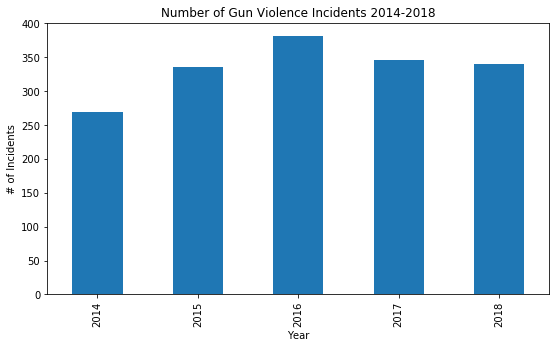

In [84]:
# bar chart of total incidents, 2014-18
%matplotlib inline
incidents_by_year_1418.plot.bar(figsize=(9,5))


plt.title("Number of Gun Violence Incidents 2014-2018")
plt.ylabel("# of Incidents")
plt.xlabel("Year")

# save the chart to analysis folder
plt.savefig("Analysis/number_of_incidents.png")

plt.show()

In [46]:
# investigate incidents per year by both year and season
# incidents_by_season_1418 = get_2014_18_data.groupby(["season", "year"])["num_incidents"].sum()
# incidents_by_season_1418

In [47]:
# create dataframe for chart 1, count of incidents per year FALL
# limit dataframe to years 2014-2018 for apples-to-apples comparison (2019 isn't completed)
incidents_by_fall = get_2014_18_data.loc[grp_incidents_by_year['season']=="Fall"]
incidents_by_fall = incidents_by_fall.groupby("year")["num_incidents"].sum()
# convert series to dataframe
incidents_by_fall.to_frame()

,num_incidents
year,
2014,61
2015,81
2016,99
2017,79
2018,86


In [48]:
# create dataframe for chart 1, count of incidents per year SPRING
# limit dataframe to years 2014-2018 for apples-to-apples comparison (2019 isn't completed)
incidents_by_spring = get_2014_18_data.loc[grp_incidents_by_year['season']=="Spring"]
incidents_by_spring = incidents_by_spring.groupby("year")["num_incidents"].sum()
# convert series to dataframe
incidents_by_spring.to_frame()

,num_incidents
year,
2014,56
2015,77
2016,83
2017,84
2018,70


In [49]:
# create dataframe for chart 1, count of incidents per year SUMMER
# limit dataframe to years 2014-2018 for apples-to-apples comparison (2019 isn't completed)
incidents_by_summer = get_2014_18_data.loc[grp_incidents_by_year['season']=="Summer"]
incidents_by_summer = incidents_by_summer.groupby("year")["num_incidents"].sum()
# convert series to dataframe
incidents_by_summer.to_frame()

,num_incidents
year,
2014,97
2015,118
2016,135
2017,105
2018,132


In [50]:
# create dataframe for chart 1, count of incidents per year WINTER
# limit dataframe to years 2014-2018 for apples-to-apples comparison (2019 isn't completed)
incidents_by_winter = get_2014_18_data.loc[grp_incidents_by_year['season']=="Winter"]
incidents_by_winter = incidents_by_winter.groupby("year")["num_incidents"].sum()
# convert series to dataframe
incidents_by_winter.to_frame()

,num_incidents
year,
2014,55
2015,59
2016,65
2017,78
2018,52


In [51]:
# merge seasons together into one table
merge01 = pd.merge(incidents_by_year_1418, incidents_by_fall, on="year")
merge02 = pd.merge(merge01, incidents_by_spring, on="year")
merge03 = pd.merge(merge02, incidents_by_summer, on="year")
merge04 = pd.merge(merge03, incidents_by_winter, on="year")

# rename columns by column index
merge04.columns.values[0] = "total_incidents"
merge04.columns.values[1] = "fall_incidents"
merge04.columns.values[2] = "spring_incidents"
merge04.columns.values[3] = "summer_incidents"
merge04.columns.values[4] = "winter_incidents"

# rename dataframe
incidents_by_seasons = merge04
incidents_by_seasons

,total_incidents,fall_incidents,spring_incidents,summer_incidents,winter_incidents
year,,,,,
2014,269,61,56,97,55
2015,335,81,77,118,59
2016,382,99,83,135,65
2017,346,79,84,105,78
2018,340,86,70,132,52


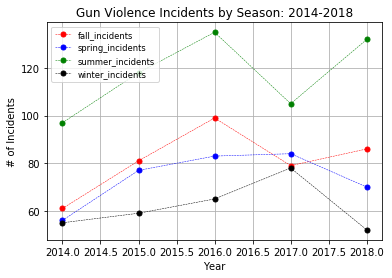

In [85]:
# create line chart for incidents by season

plt.plot(incidents_by_seasons["fall_incidents"], color="r", marker="o", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(incidents_by_seasons["spring_incidents"], color="b", marker="o", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(incidents_by_seasons["summer_incidents"], color="g", marker="o", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(incidents_by_seasons["winter_incidents"], color="k", marker="o", linestyle="dashed", markersize=5, linewidth=0.50)

plt.title("Gun Violence Incidents by Season: 2014-2018")
plt.ylabel("# of Incidents")
plt.xlabel("Year")
plt.grid(True)
plt.legend(loc="upper left", fontsize="small", fancybox=True)

# save the chart to analysis folder
plt.savefig("Analysis/incidents_by_season.png")

plt.show()

In [53]:
# export the file to csv
incidents_by_seasons.to_csv("tbl_INCIDENTS_BY_SEASON.csv", index=True)

In [54]:
# create dataframe for chart 2: 2014-2019 trend Jan-July
# limit dataframe to months Jan-July for apples-to-apples comparison
get_janjuly_data = grp_incidents_by_year.loc[grp_incidents_by_year['month_number'] <= 7]
get_janjuly_data

# create dataframe for chart #2 that counts incidents jan-july for 2014-2019
incidents_by_year_janjuly = get_janjuly_data.groupby("year")["num_incidents"].sum()
incidents_by_year_janjuly.to_frame()

,num_incidents
year,
2014,150
2015,195
2016,215
2017,213
2018,203
2019,244


In [55]:
# create dataframe for chart 3: average days between incidents 2014-2019
days_between_incidents = grp_incidents_by_year.groupby("year")["days_since_prev_incident"].mean()
days_between_incidents.to_frame()

,days_since_prev_incident
year,
2014,2.104651
2015,1.825871
2016,1.820896
2017,1.825000
2018,1.771845
2019,1.676692


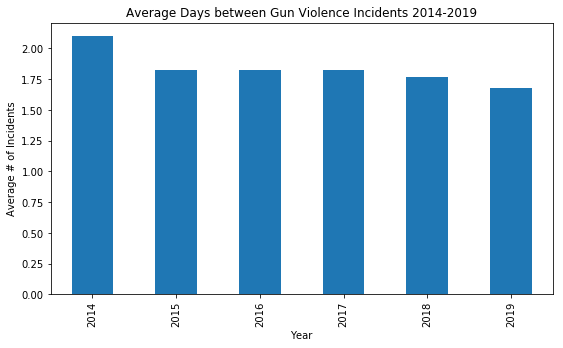

In [86]:
# bar chart of total incidents, 2014-18
%matplotlib inline
days_between_incidents.plot.bar(figsize=(9,5))


plt.title("Average Days between Gun Violence Incidents 2014-2019")
plt.ylabel("Average # of Incidents")
plt.xlabel("Year")

# save the chart to analysis folder
plt.savefig("Analysis/days_between_incidents.png")

plt.show()

In [56]:
# create dataframe for chart 4: average killed or injured 2014-2019
avg_killed_or_injured = grp_incidents_by_year.groupby("year")["num_injured_or_killed"].mean()
avg_killed_or_injured.to_frame()

,num_injured_or_killed
year,
2014,7.751445
2015,8.482587
2016,9.895522
2017,11.200000
2018,8.344660
2019,10.135338


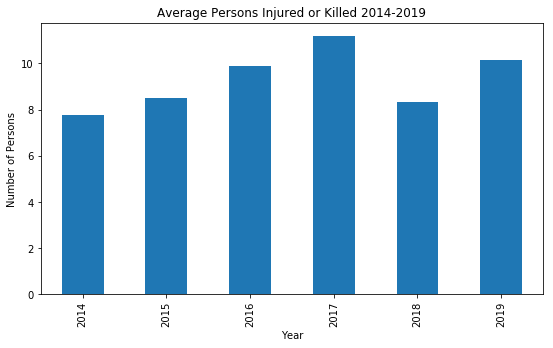

In [87]:
# bar chart of total incidents, 2014-18
%matplotlib inline
avg_killed_or_injured.plot.bar(figsize=(9,5))


plt.title("Average Persons Injured or Killed 2014-2019")
plt.ylabel("Number of Persons")
plt.xlabel("Year")

# save the chart to analysis folder
plt.savefig("Analysis/average_casualties.png")

plt.show()

In [57]:
# merge averages together into one table
merge_a = pd.merge(days_between_incidents, avg_killed_or_injured, on="year")

# rename columns by column index
merge_a.columns.values[0] = "avg_days_between_incidents"
merge_a.columns.values[1] = "avg_injured_or_killed"

# rename dataframe
avg_incidents_victims = merge_a
avg_incidents_victims

,avg_days_between_incidents,avg_injured_or_killed
year,,
2014,2.104651,7.751445
2015,1.825871,8.482587
2016,1.820896,9.895522
2017,1.825000,11.200000
2018,1.771845,8.344660
2019,1.676692,10.135338


In [58]:
# export the file to csv
avg_incidents_victims.to_csv("tbl_AVG_INCIDENTS_VICTIMS.csv", index=True)

In [59]:
# create dataframe for new chart, total incidents 2014-2018 by month
grp_incidents_by_month = pd.DataFrame(incident_data_2014_19, columns=["event_date", "year", "season", "num_incidents", "month_number", "days_since_prev_incident", "num_injured_or_killed"])

# limit dataframe to years 2014-2018 for apples-to-apples comparison (2019 isn't completed)
get_2014_18_month_data = grp_incidents_by_month.loc[grp_incidents_by_year['year']!=2019]

# create dataframe for chart #1 that counts incidents by year but excludes 2019
incidents_by_month_1418 = get_2014_18_month_data.groupby("month_number")["num_incidents"].sum()
# convert series to dataframe
incidents_by_month_1418.to_frame()

,num_incidents
month_number,
1,104
2,100
3,98
4,136
5,136
6,194
7,208
8,185
9,148


In [60]:
# export the file to csv
incidents_by_month_1418.to_csv("tbl_INCIDENTS_BY_MONTH.csv", header=True, index=True)